<ipython-input-32-aee5cce9722a>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


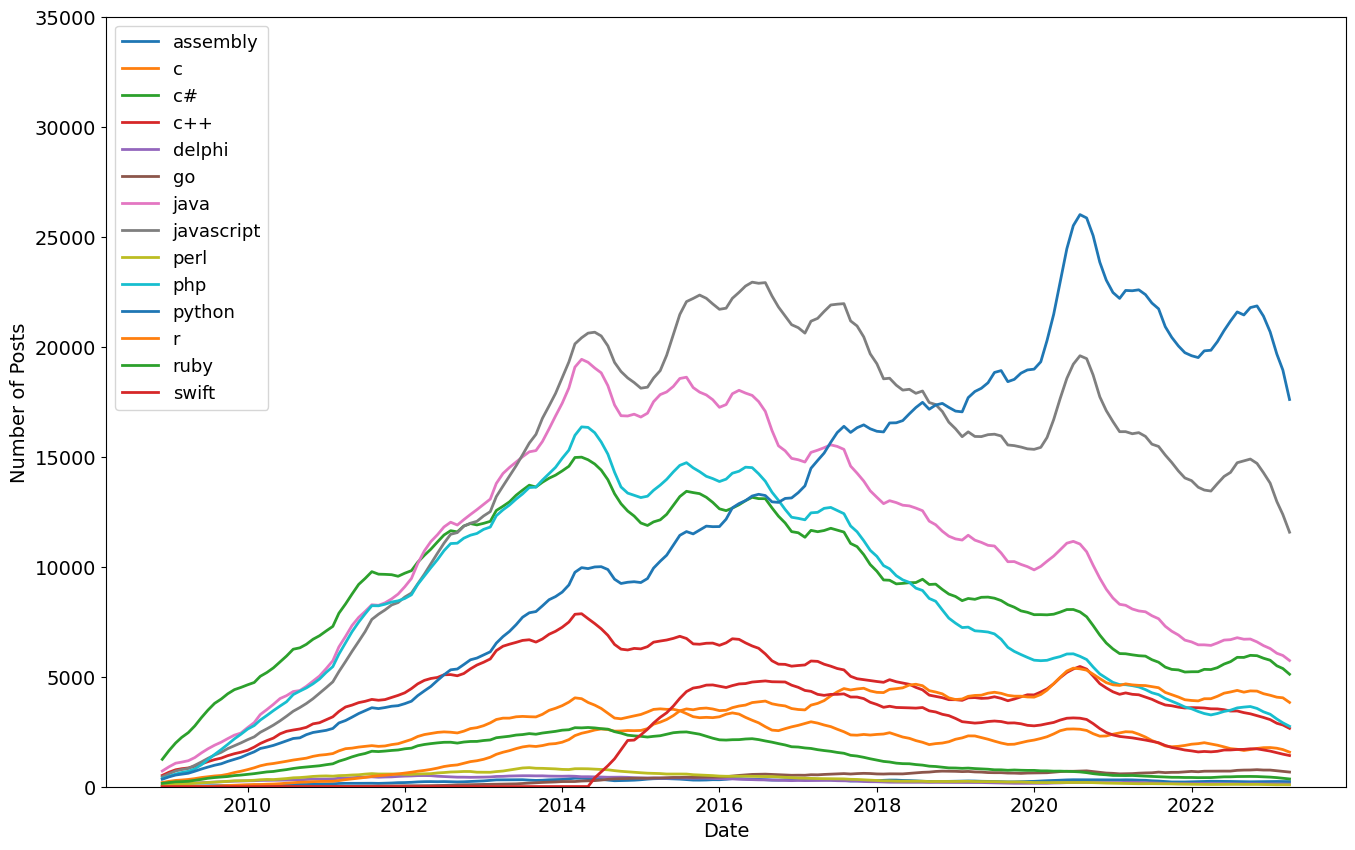

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df.head()
df.tail()
df.shape
df.count()
df.groupby('TAG').sum()
df.groupby('TAG').count()
df.DATE = pd.to_datetime(df.DATE)
reshaped_df = df.pivot(index='DATE', columns='TAG', values="POSTS")
reshaped_df.fillna(0, inplace=True)
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=2, label=roll_df[column].name)
plt.legend(fontsize=13)